### **Machine Learning Models By Md Yousuf Reja, Maria Paula Parra, Thanh Le**

##**Import libraries**

In [ ]:
# Initial imports
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# for plots to appear inside the notebook
%matplotlib inline


##**Loading The Data**

In [ ]:
url = "https://raw.githubusercontent.com/leedthanh/api/main/heart.csv"

df = pd.read_csv(url)

df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Data Contains**

Data contains;


1.   Age: age in years

2.   Sex: 1 = male; 0 = female

3. ChestPainType:
TA : Typical Angina
ATA : Atypical Angina
NAP : Non-Anginal Pain,
ASY : Asymptonic

4. RestingBP: resting blood pressure [mmHg]

5. Cholesterol:  serum cholesterol [mm/dl]

6. FastingBS:  fasting blood sugar
1 : if FastingBS > 120 mg/dl
0 : otherwise

7. RestingECG: resting electrocardiographic results
Normal : Normal
ST : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05

8. MaxHR:  maximum heart rate achived [Numeric value between 60 and 202]

9. ExerciseAngina: exercise induced angina (Y = yes; N = no)

10. Oldpeak: oldpeak [Numeric value measured in depression]

11. ST_Slope: the slope of the peak exercise ST segment
Up : upsloping
Flat : flat
Down : downsloping


12. HeartDisease: target
1 : high risk
0 : normal





# **Exploratory Data Analysis and Visulization**

In [ ]:
# Correlation Matrix # reja
df.corr()

<ipython-input-125-b0068ccbd1da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<ipython-input-126-d237110b52c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


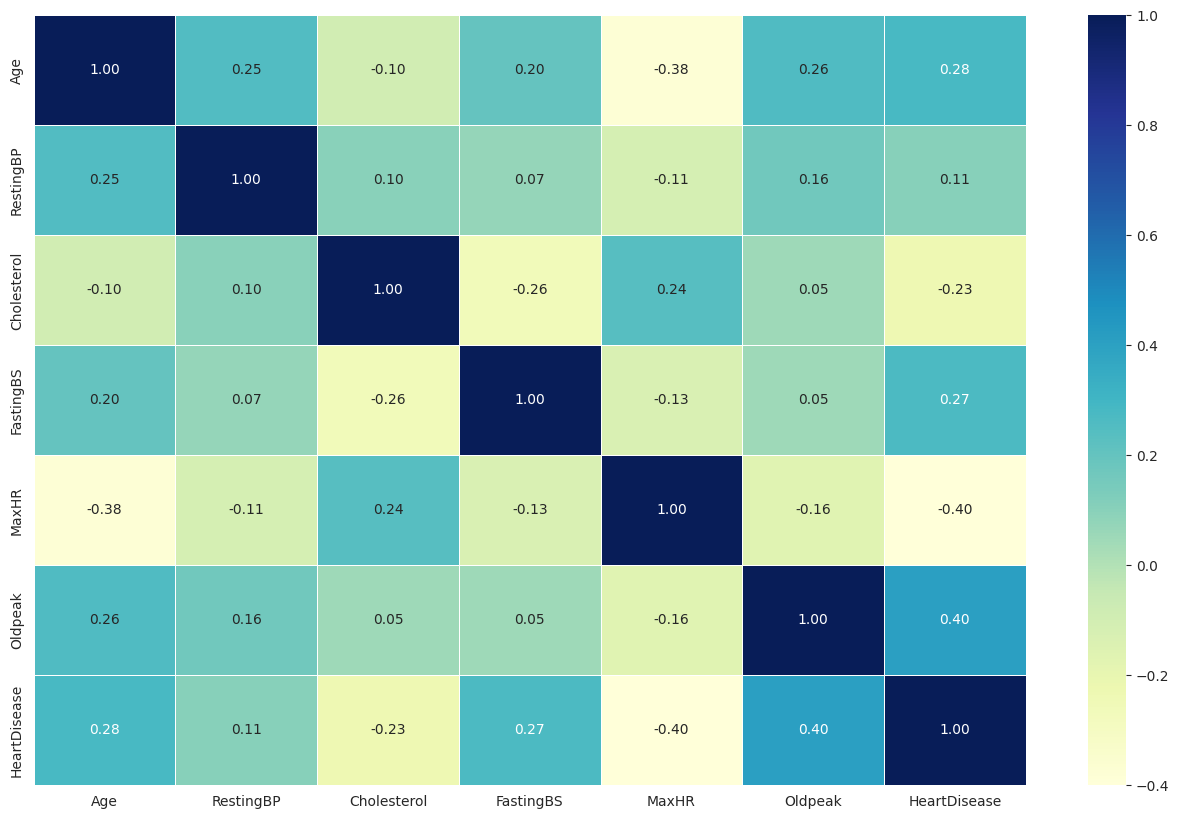

In [ ]:
correlation_matrix = df.corr()
fig,ax = plt.subplots(figsize=(16,10))
ax=sns.heatmap(correlation_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='YlGnBu')

In [ ]:

# Determine the number of unique values in each column.
application_cat = df.dtypes.index.tolist()
df[application_cat].nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
print("Data shape = ",df.shape)
print("Missing value = " ,df.isnull().values.any())

# check for missing value
df.isnull().sum()


Data shape =  (918, 12)
Missing value =  False


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# value count number of heart disease
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
#getting the percentage of patients that have heart disease and haven't heart disease
countNoDisease = len(df[df.HeartDisease == 0])
countHaveDisease = len(df[df.HeartDisease == 1])
print("Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.HeartDisease))*100)))
print("Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.HeartDisease))*100)))

Patients Haven't Heart Disease: 44.66%
Patients Have Heart Disease: 55.34%


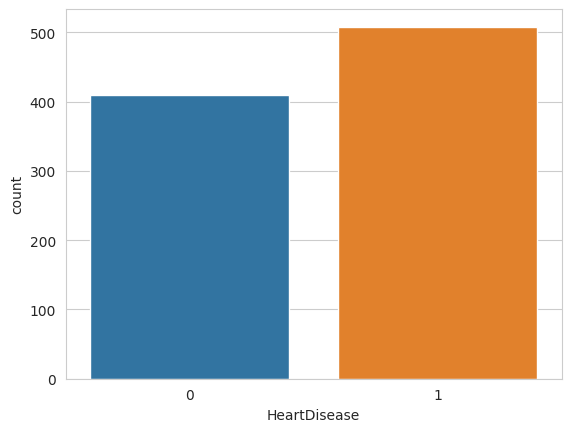

In [ ]:
# using seaborn to visualize target values
sns.countplot(x="HeartDisease", data=df)
plt.show()

In [ ]:
#convert Sex category to binary to visualize patient demographic
sex_mapping = {'F': 0, 'M': 1}
df['Sex'] = df['Sex'].map(sex_mapping)


In [ ]:
# getting the percentage of male and female patients
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])
print("Female Patients: {:.2f}%".format((countFemale / (len(df.Sex))*100)))
print("Male Patients: {:.2f}%".format((countMale / (len(df.Sex))*100)))

Female Patients: 21.02%
Male Patients: 78.98%


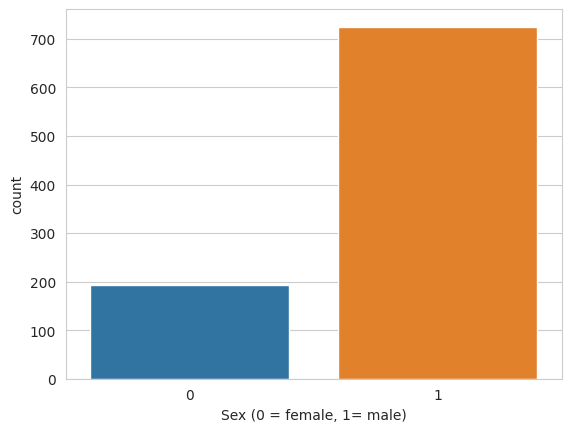

In [ ]:
sns.countplot(x='Sex', data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

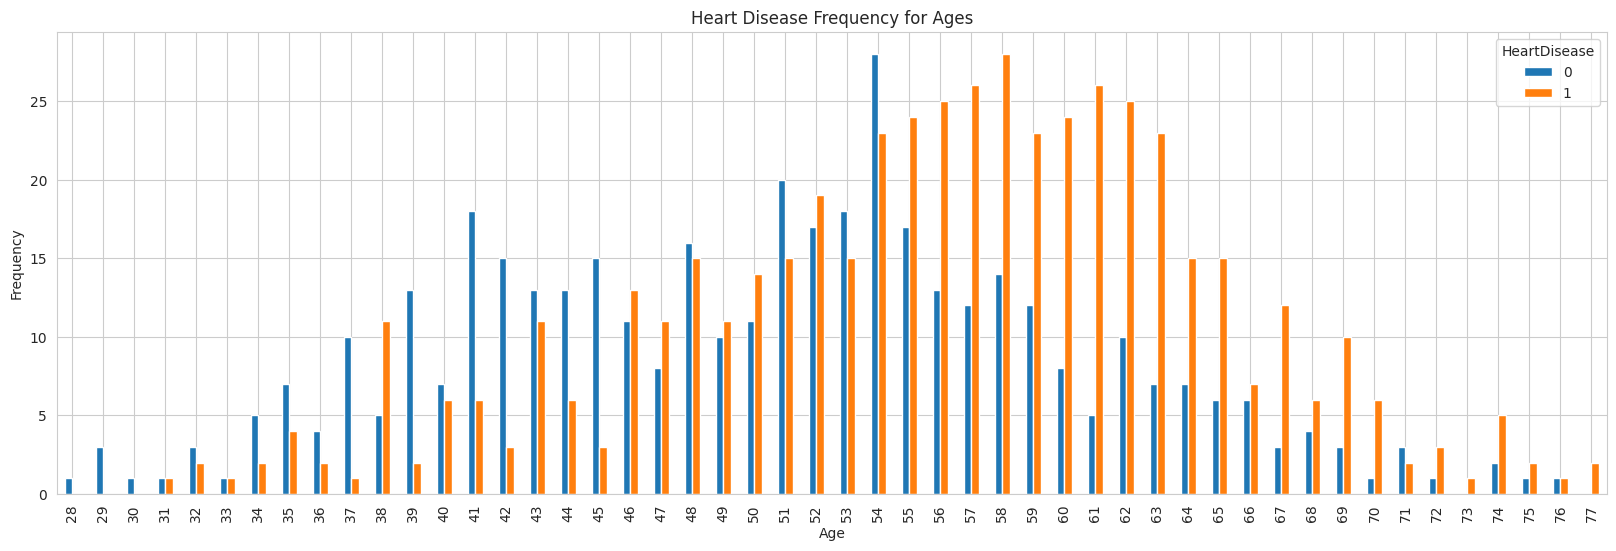

In [ ]:
# visualize heartDisease by age using bar graph

pd.crosstab(df.Age,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('heartDiseaseAndAges.png')
plt.show()

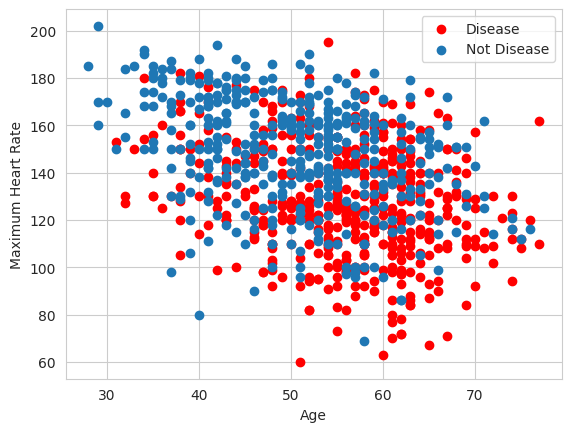

In [ ]:
#visualize heartdisease by using scatter plot

plt.scatter(x=df.Age[df.HeartDisease==1], y=df.MaxHR[(df.HeartDisease==1)], c="red")
plt.scatter(x=df.Age[df.HeartDisease==0], y=df.MaxHR[(df.HeartDisease==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# **Data Preprocessing**

In [ ]:
# since we have numerical and categorical variables
# we are going to create two group

numerical_columns = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

#list of categorical columns
categorical_columns =['ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']

##**Getting dummies variables**

In [ ]:
#getting dummies variables for categorical data

df_2 = pd.get_dummies(df, columns = categorical_columns )


df_2.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
df_2.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'HeartDisease', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
df_2.dtypes

Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
ChestPainType_ASY      uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_LVH         uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ExerciseAngina_N       uint8
ExerciseAngina_Y       uint8
ST_Slope_Down          uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
dtype: object

## **Getting target feature and scale numerical values**

In [ ]:
## Split our preprocessed data into our features and target arrays
X = df_2.drop(columns=['HeartDisease'], axis=1)
y = df_2['HeartDisease']

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# **Building and Comparing Models**

# **Logistic Regression Model**

In [ ]:
# empty dictionary to store accuracy of model
accuracies = {}

#instantiated regression model lr
lr = LogisticRegression()

# fits logistic regression model on training data X_train_scaled represent features, y_train represent corresponding target values
lr.fit(X_train_scaled,y_train)

# after model has been trained.  evaluate the test (X_test_scaled, y_test)
# used the score method to computes the accuracy of the model by comparing predictions (X_test_scaled) to actual labels (y_test)

lr_acc = lr.score(X_test_scaled,y_test)*100



In [ ]:
# logistic regression model can accurately predict 91% of heart disease
accuracies['Logistic Regression'] = lr_acc
print("Test Accuracy {:.2f}%".format(lr_acc))

Test Accuracy 89.67%


In [ ]:
y_pred_regression = lr.predict(X_test_scaled)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred_regression)
lr_precision = precision_score(y_test, y_pred_regression)
lr_recall = recall_score(y_test, y_pred_regression)
lr_f1 = f1_score(y_test, y_pred_regression)


In [ ]:
# Print the metrics
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

Accuracy: 0.8967391304347826
Precision: 0.9099099099099099
Recall: 0.9181818181818182
F1 Score: 0.914027149321267


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred_regression))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        74
           1       0.91      0.92      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



In [ ]:
X_test_scaled.shape

(184, 19)

# **Build SVM Model**

In [ ]:
#Import SVM dependencies
from sklearn import svm


In [ ]:
# empty dictionary to store accuracy of model
accuracies = {}


#svm model with kernel = to linear

#instantiated Support Vector Machine algorithm svm
clf = svm.SVC(kernel='linear') # Linear Kernel

# fits SVM model on training data X_train_scaled represent features, y_train represent corresponding target values
clf.fit(X_train_scaled, y_train)

# after model has been trained.  evaluate the test (X_test_scaled, y_test)
# used the score method to computes the accuracy of the model by comparing predictions (X_test_scaled) to actual labels (y_test)

# acc = svm.score(X_test_scaled,y_test)*100
y_pred_svm = clf.predict(X_test_scaled)

clf_accuracy = accuracy_score(y_test, y_pred_svm)
clf_precision = precision_score(y_test, y_pred_svm)
clf_recall = recall_score(y_test, y_pred_svm)
clf_f1 = f1_score(y_test, y_pred_svm)

print("Accuracy:", clf_accuracy)
print("Precision:", clf_precision)
print("Recall:", clf_recall)
print("F1 Score:", clf_f1)


Accuracy: 0.907608695652174
Precision: 0.918918918918919
Recall: 0.9272727272727272
F1 Score: 0.9230769230769231


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred_svm))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



# **Build Decision Tree Model**

In [ ]:
#Import Decision Tree Classifier dependencies
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# empty dictionary to store accuracy of model
accuracies = {}

#instantiated Decision Tree Calssifier algorithm dtc
dtc = DecisionTreeClassifier()

# fits dtc model on training data X_train_scaled represent features, y_train represent corresponding target values
dtc.fit(X_train_scaled, y_train)

# after model has been trained.  evaluate the test (X_test_scaled, y_test)
# used the score method to computes the accuracy of the model by comparing predictions (X_test_scaled) to actual labels (y_test)
y_pred_dtc = dtc.predict(X_test_scaled)

dtc_accuracy = accuracy_score(y_test, y_pred_dtc)
dtc_precision = precision_score(y_test, y_pred_dtc)
dtc_recall = recall_score(y_test, y_pred_dtc)
dtc_f1 = f1_score(y_test, y_pred_dtc)

acc = dtc.score(X_test_scaled,y_test)*100

In [ ]:
#Decision Tree Classifier can accurately predict 91% of heart disease
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 78.26%


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred_dtc))

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        74
           1       0.89      0.73      0.80       110

    accuracy                           0.78       184
   macro avg       0.78      0.80      0.78       184
weighted avg       0.81      0.78      0.78       184



# **Build Random Forest Classification Model** 

In [ ]:
#Import Random Forest Classification dependencies
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# empty dictionary to store accuracy of model
accuracies = {}

#instantiated Random forest Calssifier algorithm rf
rf =  RandomForestClassifier(n_estimators = 1000, random_state = 1)

# fits rf model on training data X_train_scaled represent features, y_train represent corresponding target values
rf.fit(X_train_scaled, y_train)

# after model has been trained.  evaluate the test (X_test_scaled, y_test)
# used the score method to computes the accuracy of the model by comparing predictions (X_test_scaled) to actual labels (y_test)
y_pred_rf = rf.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

acc = rf.score(X_test_scaled,y_test)

In [ ]:
#Random Forest Classifier can accurately predict 91% of heart disease
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 0.90%


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred_rf))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        74
           1       0.90      0.93      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



# **Applying model to make a prediction**

In [ ]:
# logistic regression model
y_lr_train_pred = lr.predict(X_train_scaled)
y_lr_test_pred = lr.predict(X_test_scaled)

In [ ]:
y_lr_train_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [ ]:
y_lr_test_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
# input value for test patient
# I used index number for patient instead of typing out binary numbers
test_patient = X_test.loc[3, ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']].values.reshape(1, -1)

In [ ]:

# # Make prediction
predicted_label = clf.predict(test_patient)

# Map numerical label to meaningful category
if predicted_label == 0:
    print("Low risk")
else:
    print("High risk")

Low risk


In [ ]:
# support vector machine model can accurately predict 91% of heart disease
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 0.90%


# **Evaluate Model Performance**

In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_accuracy, lr_precision, lr_recall, lr_f1]).transpose()
lr_results.columns = ['Algorithms', 'Accuracy', 'Precision', 'Recall', 'F1-Scort']


In [ ]:
clf_results = pd.DataFrame(['Support Vector Machine', clf_accuracy, clf_precision, clf_recall, clf_f1]).transpose()
clf_results.columns = ['Algorithms', 'Accuracy', 'Precision', 'Recall', 'F1-Scort']

In [ ]:
dtc_results = pd.DataFrame(['Decision Tree Model', dtc_accuracy, dtc_precision, dtc_recall, dtc_f1]).transpose()
dtc_results.columns = ['Algorithms', 'Accuracy', 'Precision', 'Recall', 'F1-Scort']

In [ ]:
rf_results = pd.DataFrame(['Random Forest Classification', rf_accuracy, rf_precision, rf_recall, rf_f1]).transpose()
rf_results.columns = ['Algorithms', 'Accuracy', 'Precision', 'Recall', 'F1-Scort']

# **Visualization of models performance**

In [ ]:
df_models = pd.concat([lr_results, clf_results, dtc_results, rf_results], axis=0)
df_models.reset_index(drop=True)


,Algorithms,Accuracy,Precision,Recall,F1-Scort
0,Linear regression,0.896739,0.90991,0.918182,0.914027
1,Support Vector Machine,0.907609,0.918919,0.927273,0.923077
2,Decision Tree Model,0.782609,0.888889,0.727273,0.8
3,Random Forest Classification,0.896739,0.902655,0.927273,0.914798


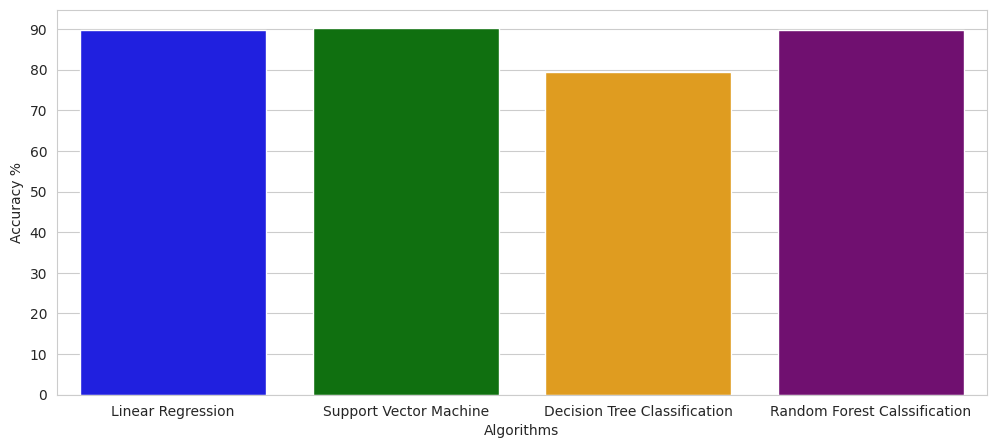

In [ ]:

accuracies = {"Linear Regression": 89.67, "Support Vector Machine": 90.76, "Decision Tree Classification": 78.26, "Random Forest Calssification": 89.67}
colors = ["blue", "green", "orange", "purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# **Generate and Compare Confusion Metrix** 

In [ ]:
from sklearn.metrics import confusion_matrix

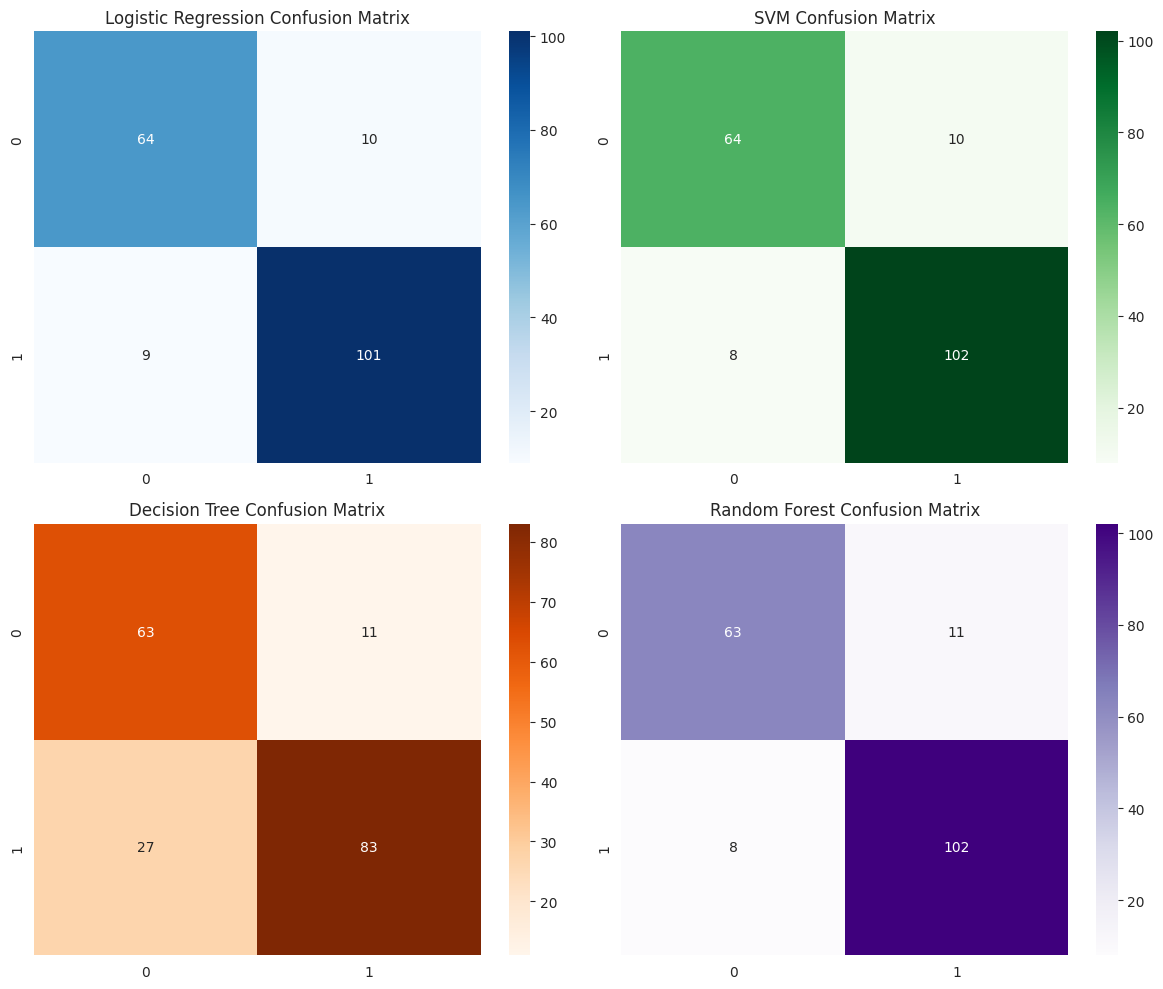

In [ ]:
# Logistic Regression Confusion Matrix
lr_pred = lr.predict(X_test_scaled)
lr_cm = confusion_matrix(y_test, lr_pred)

# SVM Confusion Matrix
svm_pred = clf.predict(X_test_scaled)
svm_cm = confusion_matrix(y_test, svm_pred)

# Decision Tree Confusion Matrix
dtc_pred = dtc.predict(X_test_scaled)
dtc_cm = confusion_matrix(y_test, dtc_pred)

# Random Forest Confusion Matrix
rf_pred = rf.predict(X_test_scaled)
rf_cm = confusion_matrix(y_test, rf_pred)

# Plotting Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Logistic Regression
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression Confusion Matrix')

# SVM
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('SVM Confusion Matrix')

# Decision Tree
sns.heatmap(dtc_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 0])
axes[1, 0].set_title('Decision Tree Confusion Matrix')

# Random Forest
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Purples', ax=axes[1, 1])
axes[1, 1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

# **Deep Learning**

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train.shape[1]


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                1600      
                                                                 
 dense_4 (Dense)             (None, 40)                3240      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 4881 (19.07 KB)
Trainable params: 4881 (19.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
train_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 0.5619 - accuracy: 0.7548
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8597
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8651
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.8651
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8747
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8747
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8787
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8774
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.8828
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.8869
Epoch 11/50
23/23 [

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 0.4746 - accuracy: 0.8641 - 232ms/epoch - 39ms/step
Loss: 0.4745792746543884, Accuracy: 0.864130437374115



**Additional Attempt 01 : Deep Learning** (reja)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train.shape[1]
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 10


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation='relu', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                1000      
                                                                 
 dense_11 (Dense)            (None, 25)                1275      
                                                                 
 dense_12 (Dense)            (None, 10)                260       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2546 (9.95 KB)
Trainable params: 2546 (9.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
train_model = nn.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
23/23 [==============================] - 1s 3ms/step - loss: 0.6540 - accuracy: 0.5450
Epoch 2/25
23/23 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.5872
Epoch 3/25
23/23 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7084
Epoch 4/25
23/23 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.8025
Epoch 5/25
23/23 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.8338
Epoch 6/25
23/23 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8324
Epoch 7/25
23/23 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8474
Epoch 8/25
23/23 [==============================] - 0s 3ms/step - loss: 0.3944 - accuracy: 0.8460
Epoch 9/25
23/23 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8501
Epoch 10/25
23/23 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8597
Epoch 11/25
23/23 [

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 0.6176 - accuracy: 0.8696 - 29ms/epoch - 5ms/step
Loss: 0.6175777316093445, Accuracy: 0.8695651888847351


**Additional Attempt 02 : Deep Learning** (reja)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train.shape[1]
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 7
hidden_nodes_layer4 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation='relu', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 15)                300       
                                                                 
 dense_25 (Dense)            (None, 10)                160       
                                                                 
 dense_26 (Dense)            (None, 7)                 77        
                                                                 
 dense_27 (Dense)            (None, 5)                 40        
                                                                 
 dense_28 (Dense)            (None, 1)                 6         
                                                                 
Total params: 583 (2.28 KB)
Trainable params: 583 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
train_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
23/23 [==============================] - 2s 4ms/step - loss: 0.6686 - accuracy: 0.6335
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.7221
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7480
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7943
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4347 - accuracy: 0.8215
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.3945 - accuracy: 0.8515
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8638
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8597
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8678
Epoch 10/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.8719
Epoch 11/50
23/23 [

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 0.2974 - accuracy: 0.9022 - 144ms/epoch - 24ms/step
Loss: 0.29737624526023865, Accuracy: 0.9021739363670349
